In [13]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
dataframe1 = pd.read_csv('./output_test.csv')

In [ ]:
dataframe1

显然地可以看出来 上述csv文件已经可以被导入到pandas中，接下来我们就可以对它进行操作了

In [ ]:
body_counuts = dataframe1.通知人.value_counts()

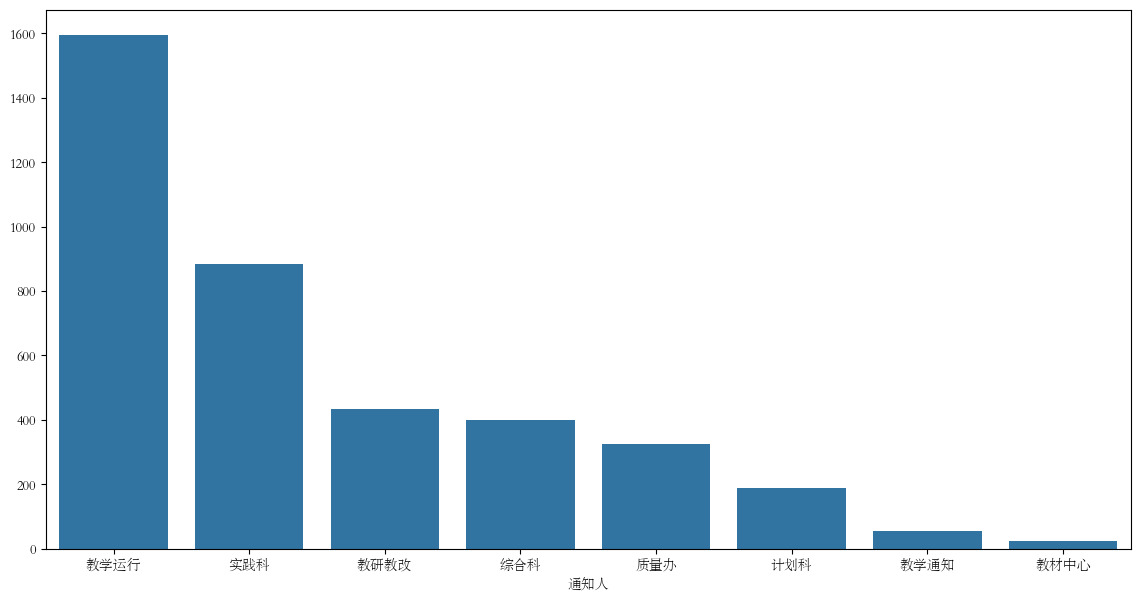

In [ ]:
# 设置Matplotlib的字体参数
plt.rcParams['font.sans-serif'] = ['STSong']  # 使用宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
# 解决不显示中文的方案

plt.figure(figsize=(14,7))
sns.barplot(x=body_counuts.index, y=body_counuts.values)
plt.show()

上面分析的是有关于教务处的信息通知人来源，我们可以发现大多数的通知人来源于教学运行

In [ ]:
#接下来分析的是 附件下载次数与通知人的关系

C:\Users\Slexy\AppData\Local\Temp\ipykernel_34048\1192918186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = result['通知人'],y = result['附件下载总次数'],palette="Greens_d")


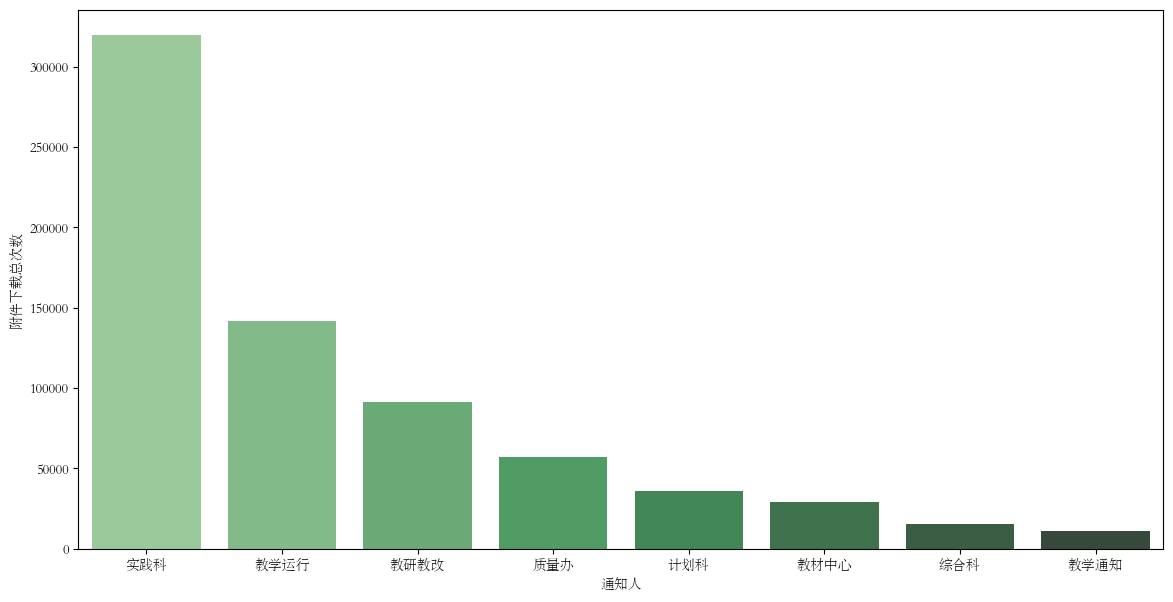

In [68]:
result = dataframe1.groupby('通知人')['附件下载总次数'].sum().reset_index()
result = result.sort_values(by = '附件下载总次数',ascending = False)

plt.figure(figsize=(14,7))
sns.barplot(x = result['通知人'],y = result['附件下载总次数'],palette="Greens_d")
plt.show()

我们可以发现 实践科 的附件下载次数是最高的甚至于到达了 300000+ 的次数 （好恐怖

接下来我们想对发布通知的频繁程度进行比较

In [104]:
dataframe1 = pd.read_csv('./output_test.csv')

In [ ]:
data_anlysis = dataframe1
data_anlysis

In [ ]:
data_anlysis['日期'] = pd.to_datetime(data_anlysis['日期'])
data_anlysis['Year'] = data_anlysis['日期'].dt.year
data_anlysis['Month'] =  data_anlysis['日期'].dt.month

data_anlysis.set_index('日期', inplace=True)
data_anlysis


In [ ]:
df_resampled = data_anlysis.resample('Y').count()
df_resampled



C:\Users\Slexy\AppData\Local\Temp\ipykernel_34048\4237973927.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_resampled = data_anlysis.resample('Y').count()


,通知人,标题,详情链接,附件下载总次数,附件名(以空格作为间隔),Year,Month
日期,,,,,,,
2002-12-31,3,3,3,3,0,3,3
2003-12-31,31,31,31,31,0,31,31
2004-12-31,32,32,32,32,0,32,32
2005-12-31,39,39,39,39,0,39,39
2006-12-31,131,131,131,131,0,131,131
2007-12-31,205,205,205,205,0,205,205
2008-12-31,139,139,139,139,0,139,139
2009-12-31,164,164,164,164,0,164,164
2010-12-31,149,149,149,149,0,149,149


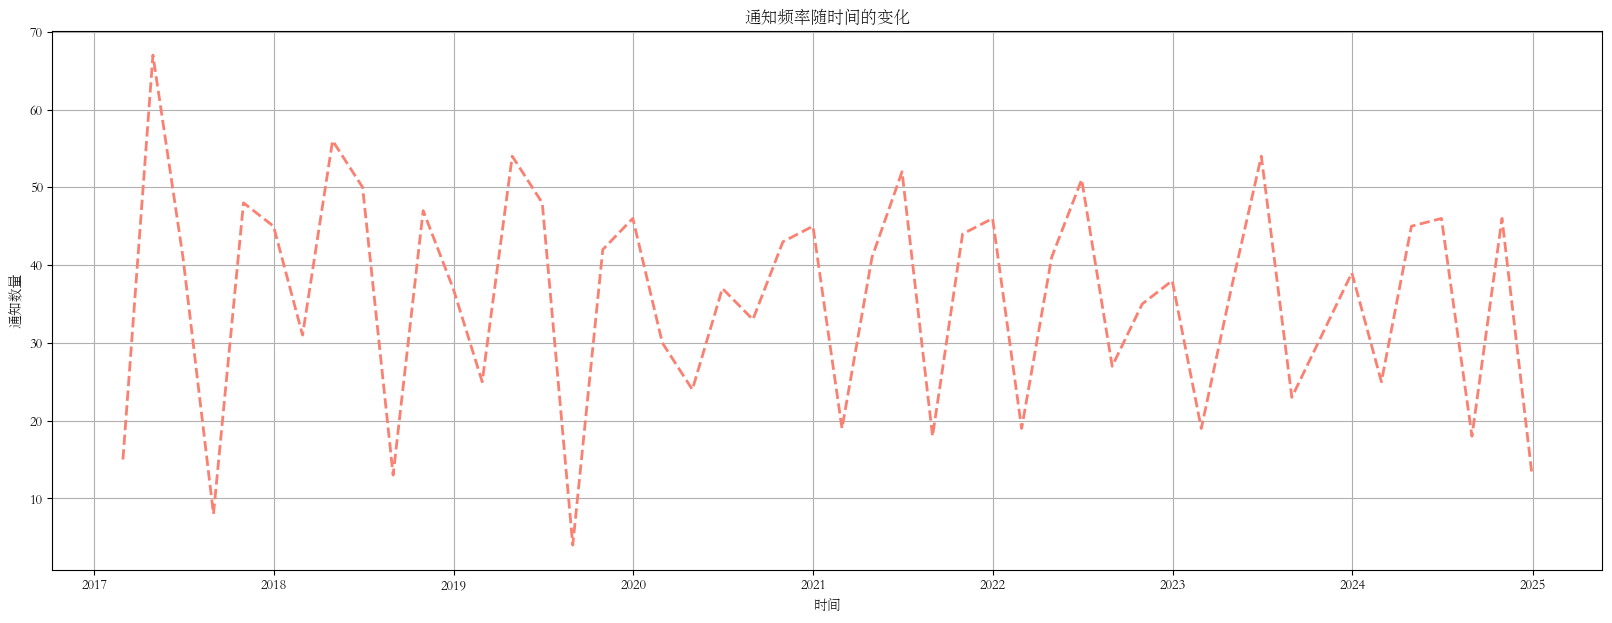

In [ ]:

plt.figure(figsize=(20, 7))
sns.lineplot(data=df_resampled['通知人'],color="salmon",ls="--", lw=2, markers=Trueheight=3, aspect=.75, linewidth=2.5,)
plt.title('通知频率随时间的变化')
plt.xlabel('时间')
plt.ylabel('通知数量')
plt.grid(True)
plt.show()